In [1]:
print('Lecture-13')

Lecture-13


### Özellik Ölçeklendirmesi (Feature Scaling)

Veri Dönüştürmesi (data transformation) --> Özellik ölçeklendirmesi.
Eğer bir veri tablosundaki sütunlarda bulunan değerlerin mertebeleri birbirinden çok farklı ise yapay sinir ağlarının bu durumlarda başarısı düşmektedir. Verilerin farklı mertebelere sahip olması aynı zamanda "geç yakınsama" sorunları da oluşturmaktadır. Örneğin bir evin fiyatının tahmin edilmesi örneğinde sütunların birinde evin kira geliri 1000'li mertebede iken diğer bir sütunda bulunan evin yaşı çok küçük bir mertebededir.

Bir nöorna giren değerlerin ağırlıklarla çarpılarak toplandığını biliyoruz. Bu durumda yüksek mertebedeki değerler düşük mertebekdeki değerlerin etkisini azaltabilecektir. Feature Scaling yalnızca YSA değil makine öğrenmesinin diğer bazı konularında da uygulanan bir tekniktir.

1) Standart Ölçekleme (Standard Scaling):
Bu yöntemde sütunun ortalaması ve standart sapması bulunur. Sonra sütundaki her değer ortalamadan çıkartılıp standart sapmaya bölünerek yeniden sütuna yazılır.

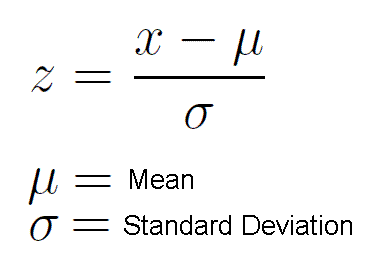

feature standardization




In [8]:
import numpy as np

def standard_scale(dataset):
    for col in range(dataset.shape[1]):
        coldata = dataset[:, col]
        dataset[:, col] = (coldata - np.mean(coldata)) / np.std(coldata)

dataset = np.loadtxt('SampleFile.csv', skiprows=1, delimiter=',')
standard_scale(dataset)
print(dataset)

[[-0.20714171  0.07337496]
 [-0.09188637 -0.87256276]
 [ 0.07347998  0.07337496]
 ...
 [-0.14781027  0.30985939]
 [-0.08016039 -0.87256276]
 [-0.05811155 -0.87256276]]


In [9]:
from sklearn.preprocessing import StandardScaler

dataset = np.loadtxt('SampleFile.csv', skiprows=1, delimiter=',')
ss = StandardScaler()
scaled_dataset = ss.fit_transform(dataset)
print(scaled_dataset)

[[-0.20714171  0.07337496]
 [-0.09188637 -0.87256276]
 [ 0.07347998  0.07337496]
 ...
 [-0.14781027  0.30985939]
 [-0.08016039 -0.87256276]
 [-0.05811155 -0.87256276]]


Standard Ölçeklendirme sütunların normal dağılıma uyduğu durumlarda uygulanması tavsiye edilen bir tekniktir. Sütunların bu biçimde standart hale getirilmesi sonucunda değerlerin belli bir aralıkta ölçeklendirilmediğine ancak büyük ölçüde 0 değerinin etrafında kümelendirildiğine dikkat edelim.

Veri kümesini önce "eğitim" ve "test" biçiminde ayırdıktan sonra ölçeklendirmenin yapılması gerekir. Test veri kümesi de evaluate metodu ile test işlemi yapılmadan önce ölçeklendirilmiş olmalıdır. Test veri kümesinin ölçeklendirilmesinde eğitim veri kümesindeki ölçeklendirme bilgileri kullanılmalıdır. Yani önce biz train_test_split ile veri kümeimizi ayrıştırıyoruz. Daha sonra da "eğitim" veri kümesini ölçeklendirip bu ölçeklendirme bilgisini "test" veri kümesinin ölçeklendirmesinde kullanmalıyız. Bu nedenle uygulamada ölçeklendirme sırasında fit ile transform işlemini ayırmak, fit işlemini eğitim veri kümesi için bir kez yapıp transform işlemini hem eğitim veri kümesi için hem de test veri kümesi için yapmak daha uygun bir yöntemdir.

In [10]:
import numpy as np 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

dataset = np.loadtxt('diabetes.csv', skiprows=1, delimiter=',')
dataset_x = dataset[:, :-1]
dataset_y = dataset[:, -1]
training_dataset_x, test_dataset_x, training_dataset_y, test_dataset_y = train_test_split(dataset_x, dataset_y, test_size=0.2)

ss = StandardScaler()
ss.fit(training_dataset_x)
scaled_training_dataset_x = ss.transform(training_dataset_x)
scaled_test_dataset_x = ss.transform(test_dataset_x)

In [11]:
scaled_training_dataset_x

array([[-0.84863883,  1.12917166,  0.13745976, ..., -0.81751976,
        -1.08320159, -0.79602039],
       [-0.5525796 ,  1.16036116,  1.05264368, ..., -0.05895169,
         1.06902637,  2.80408024],
       [-0.84863883, -0.86695635, -0.67603705, ..., -1.2094466 ,
        -0.15540831, -0.96745375],
       ...,
       [-0.25652037, -0.77338785,  0.44252107, ...,  0.66168797,
        -0.72028925,  0.57544652],
       [-0.84863883, -0.74219835, -0.06591444, ..., -0.61523494,
         1.98419662, -0.96745375],
       [-0.84863883, -0.05602935,  0.95095658, ...,  1.67311207,
         0.12861005, -0.62458702]])

In [12]:
scaled_test_dataset_x

array([[ 0.03953885, -1.11647235, -0.57434995, ..., -0.53937814,
        -0.50569761, -0.45315366],
       [ 0.63165731,  2.28318316,  0.44252107, ..., -1.08301859,
        -1.06426703,  2.20406347],
       [-0.5525796 , -0.96052485,  0.54420817, ..., -0.96923338,
        -0.6855759 , -0.79602039],
       ...,
       [ 0.92771654,  0.66132915,  1.05264368, ..., -0.21066531,
        -1.06742279,  0.83259656],
       [-0.84863883,  0.31824465, -0.26928864, ..., -1.05773299,
        -0.24376957, -1.05317043],
       [-0.5525796 , -0.05602935, -3.5232759 , ..., -1.57608783,
         1.15423188,  3.31838033]])

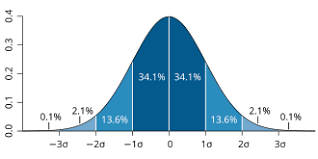

Standart ölçeklendirme sütun verilerinin normal dağııldığı durumlarda tercih edilmesi gereken bir tekniktir. Dolayısıyla "diabetes.csv" sütunlarının normal dağıldığını bilmedikten sonra bu tekniği kullanmamamız gerekir. 

array([[<Axes: title={'center': 'Pregnancies'}>,
        <Axes: title={'center': 'Glucose'}>,
        <Axes: title={'center': 'BloodPressure'}>],
       [<Axes: title={'center': 'SkinThickness'}>,
        <Axes: title={'center': 'Insulin'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'DiabetesPedigreeFunction'}>,
        <Axes: title={'center': 'Age'}>, <Axes: >]], dtype=object)

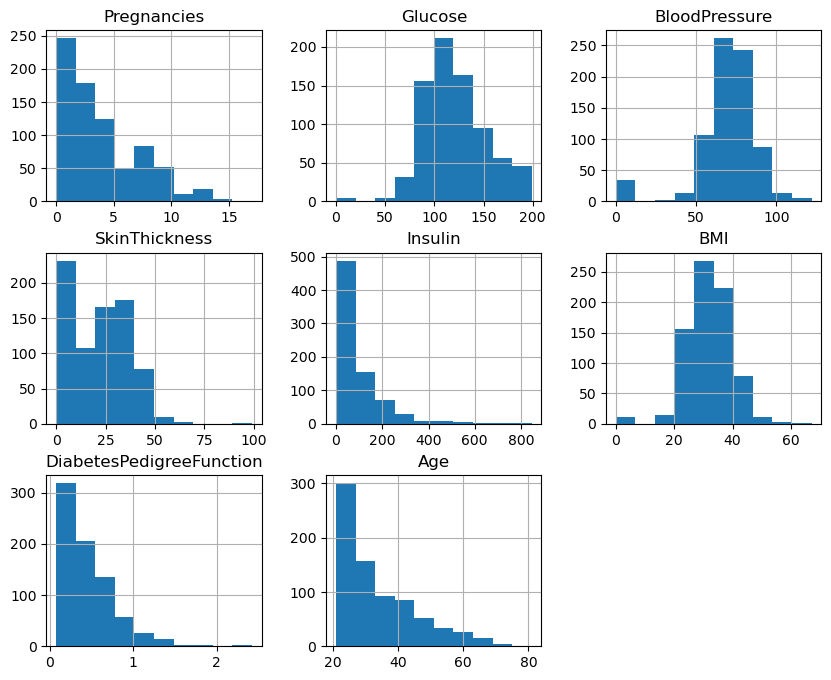

In [13]:
import pandas as pd

df = pd.read_csv('diabetes.csv')
df.iloc[:, :-1].hist(figsize=(10, 8))

Ölçeklendirmede diğer önemli bir nokta da eğer veriler ölçeklendirme ile oluşturulmuşsa predict işlemi yapılırken predict metoduna geçirilecek değerlerin de aynı ortalama ve standart sapma değerleriyle ölçekledirmeye sokulması gerekmektedir.

predict_result = model.predict(ss.transform(predict_data))s

__Min-Max Ölçeklendirmesi__:
Bu ölçeklendirmede sütunun en küçük ve en büyük elemanları bulunur. Bu elemanlara göre ölçeklendirme yapılır.

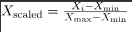

Buradan elde edilen değerler her zaman [0, 1] arasında olacaktır.

In [14]:
from sklearn.preprocessing import MinMaxScaler

df = pd.read_csv('SampleFile.csv')

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df)
scaled_df = pd.DataFrame(scaled_data, columns=df.columns)

scaled_df

,LotArea,MSSubClass
0,0.033420,0.235294
1,0.038795,0.000000
2,0.046507,0.235294
3,0.038561,0.294118
4,0.060576,0.235294
...,...,...
1455,0.030929,0.235294
1456,0.055505,0.000000
1457,0.036187,0.294118
1458,0.039342,0.000000


__Mutlak Max Ölçeklendirmesi (Absolute Max Scaling):__

Sütundaki değerler sütunun en büyük değerinin mutlak değerine bölünerek dönüştürülmektedir.

x_yeni = x / |max(x)|

Bu işlem sonucunda değerlerin [min, 1] aralığnıda ölçeklendirildiğini görüyoruz. Eğer tüm değerler pozitif ise bu ölçekledirme Min-Max ölçeklendirmesine benzemektedir.



In [16]:
from sklearn.preprocessing import MaxAbsScaler

mas = MaxAbsScaler()
scaled_dataset = mas.fit_transform(df)
print(dataset)
print(scaled_dataset)

[[  6.    148.     72.    ...   0.627  50.      1.   ]
 [  1.     85.     66.    ...   0.351  31.      0.   ]
 [  8.    183.     64.    ...   0.672  32.      1.   ]
 ...
 [  5.    121.     72.    ...   0.245  30.      0.   ]
 [  1.    126.     60.    ...   0.349  47.      1.   ]
 [  1.     93.     70.    ...   0.315  23.      0.   ]]
[[0.03925759 0.31578947]
 [0.04460034 0.10526316]
 [0.05226602 0.31578947]
 ...
 [0.04200794 0.36842105]
 [0.04514391 0.10526316]
 [0.046166   0.10526316]]


__Normalleştirme (Normalizer)__:

Bu yöntem min-max yöntemi ile hemen hemen aynıdır ancak burada minimum değer yerine her girdiyi tüm verinin ortalama değerinden çıkarıp sonucu minimum ve maksimum değer arasındaki faka bölüyoruz.

Xscaled = (Xi - Xmean) / (Xmax - Xmin) 

In [17]:
from sklearn.preprocessing import Normalizer

scaler = Normalizer()
scaled_data = scaler.fit_transform(df)
scaled_df = pd.DataFrame(scaled_data, columns=df.columns)
print(scaled_df.head())

    LotArea  MSSubClass
0  0.999975    0.007100
1  0.999998    0.002083
2  0.999986    0.005333
3  0.999973    0.007330
4  0.999991    0.004208


__Robust Scaler:__

Medyan ve dörlü aralığı (IQR) hesaplanıp, her bir girdiden medyanı çıkarıyoruz ardından sonucu çeyrekler arası değer aralığına bölüyoruz.

In [18]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
scaled_data = scaler.fit_transform(df)
scaled_df = pd.DataFrame(scaled_data, columns=df.columns)
print(scaled_df.head())

    LotArea  MSSubClass
0 -0.254076         0.2
1  0.030015        -0.6
2  0.437624         0.2
3  0.017663         0.4
4  1.181201         0.2


Epoch 1/100
16/16 [==============================] - 4s 31ms/step - loss: 0.6795 - binary_accuracy: 0.5947 - val_loss: 0.6528 - val_binary_accuracy: 0.6748
Epoch 2/100
16/16 [==============================] - 0s 5ms/step - loss: 0.6546 - binary_accuracy: 0.6538 - val_loss: 0.6369 - val_binary_accuracy: 0.6748
Epoch 3/100
16/16 [==============================] - 0s 9ms/step - loss: 0.6447 - binary_accuracy: 0.6538 - val_loss: 0.6212 - val_binary_accuracy: 0.6748
Epoch 4/100
16/16 [==============================] - 0s 5ms/step - loss: 0.6318 - binary_accuracy: 0.6680 - val_loss: 0.6055 - val_binary_accuracy: 0.6748
Epoch 5/100
16/16 [==============================] - 0s 5ms/step - loss: 0.6201 - binary_accuracy: 0.6823 - val_loss: 0.5885 - val_binary_accuracy: 0.6911
Epoch 6/100
16/16 [==============================] - 0s 5ms/step - loss: 0.6072 - binary_accuracy: 0.6802 - val_loss: 0.5727 - val_binary_accuracy: 0.6911
Epoch 7/100
16/16 [==============================] - 0s 5ms/step - lo

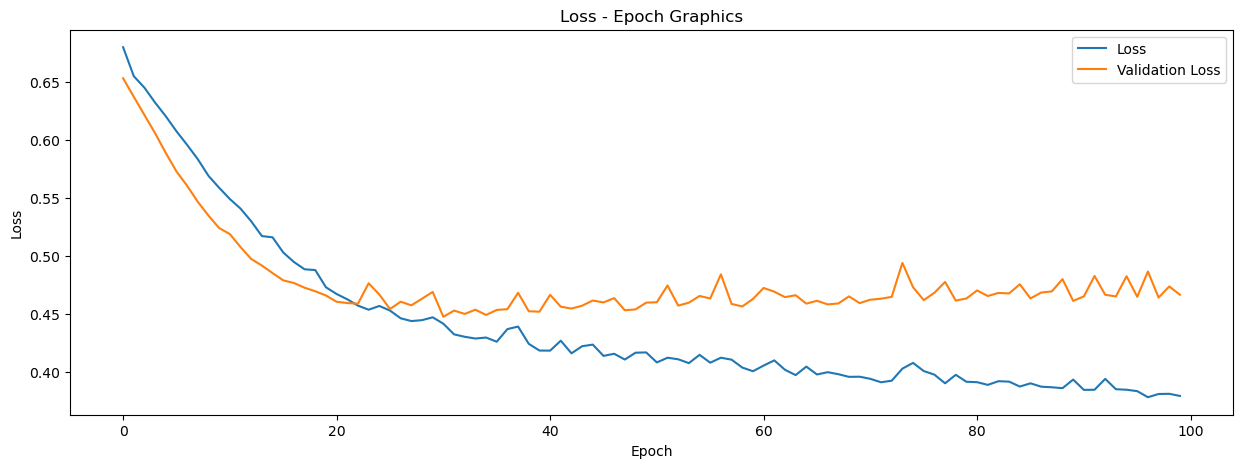

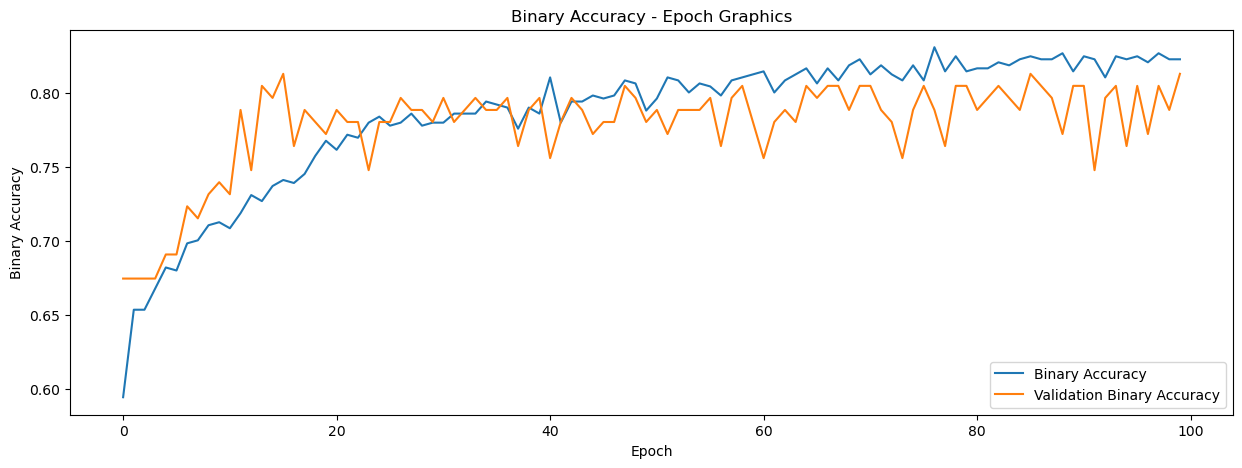

5/5 [==============================] - 0s 2ms/step - loss: 0.5495 - binary_accuracy: 0.7403
loss: 0.5495235323905945
binary_accuracy: 0.7402597665786743


In [19]:
import pandas as pd
import matplotlib.pyplot as plt

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

df = pd.read_csv('diabetes.csv')

dataset_x = df.iloc[:, :-1].to_numpy()
dataset_y = df.iloc[:, -1].to_numpy()

training_dataset_x, test_dataset_x, training_dataset_y, test_dataset_y = train_test_split(dataset_x, dataset_y, test_size=0.20)

mms = MinMaxScaler()
mms.fit(training_dataset_x)
scaled_training_dataset_x = mms.transform(training_dataset_x)
scaled_test_dataset_x = mms.transform(test_dataset_x)

model = Sequential(name='Diabetes')
model.add(Dense(64, activation='relu', input_dim=dataset_x.shape[1], name = 'Hidden-1'))
model.add(Dense(64, activation='relu', name = 'Hidden-2'))
model.add(Dense(1,  activation='sigmoid', name = 'Output'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['binary_accuracy'])

hist = model.fit(scaled_training_dataset_x, training_dataset_y, batch_size=32, epochs=100, validation_split=0.2)

figure = plt.gcf()
figure.set_size_inches((15, 5))
plt.title('Loss - Epoch Graphics')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.plot(hist.epoch, hist.history['loss'])
plt.plot(hist.epoch, hist.history['val_loss'])
plt.legend(['Loss', 'Validation Loss'])
plt.show()

figure = plt.gcf()
figure.set_size_inches((15, 5))
plt.title('Binary Accuracy - Epoch Graphics')
plt.xlabel('Epoch')
plt.ylabel('Binary Accuracy')
plt.plot(hist.epoch, hist.history['binary_accuracy'])
plt.plot(hist.epoch, hist.history['val_binary_accuracy'])
plt.legend(['Binary Accuracy', 'Validation Binary Accuracy'])
plt.show()

eval_result = model.evaluate(scaled_test_dataset_x, test_dataset_y)
for i in range(len(eval_result)):
    print(f'{model.metrics_names[i]}: {eval_result[i]}')

Bir önceki tahmin ile kıyaslayalım: 

loss: 0.9023799896240234
binary_accuracy: 0.6510416865348816


__ÖDEV: Bu model ile diğer ölçeklendirme fonksiyonlarını deneyerek aralarında değişimi inceleyiniz.__